In [8]:
#import all the libraries needed
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#read the data
data = pd.read_csv("C:\\Users\\tejan\\Downloads\\creditcardfraud\\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Break the data according to class labels, randomly split them into train, test data at 75:25 proportion and join the data accordingly
data_class0 = data[data.Class == 0]
data_class1 = data[data.Class == 1]

#holdout method splitting
data_class0_train, data_class0_test = train_test_split(data_class0, test_size = 0.25,random_state = 12356) 
data_class1_train, data_class1_test = train_test_split(data_class1, test_size = 0.25,random_state = 12356) 

#joining back
data_train = pd.concat([data_class0_train, data_class1_train], ignore_index = True)
data_test = pd.concat([data_class0_test, data_class1_test], ignore_index = True)

In [4]:
#dropping the 'time' variable
data.drop(['Time'], axis = 1, inplace = True)
data_train.drop(['Time'], axis = 1, inplace = True)
data_test.drop(['Time'], axis = 1, inplace = True)

#converting the data to features and labels, then convert to arrays
X_train = data_train.iloc[:, :-1].values
y_train = data_train.iloc[:, -1].values
X_test = data_test.iloc[:, :-1].values
y_test = data_test.iloc[:, -1].values

#scale the data using standardization
scaler = preprocessing.StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)

In [6]:
#perform random undersampling of the data
rus = RandomUnderSampler(random_state=123)
X_rus, y_rus = rus.fit_resample(X_train_standardized, y_train)
print('Undersampled training dataset shape %s' % Counter(y_rus))
print('Original training dataset shape %s' % Counter(y_train))
print('Original testing dataset shape %s' % Counter(y_test))

Undersampled training dataset shape Counter({0: 369, 1: 369})
Original training dataset shape Counter({0: 213236, 1: 369})
Original testing dataset shape Counter({0: 71079, 1: 123})


In [11]:
#Build a 2 neighbor KNN model and print all the related metrics
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_rus, y_rus)

#predict using the test data
y_pred = neigh.predict(X_test_standardized)

#print all the related metrics
print("test accuracy", accuracy_score(y_test, y_pred))
print("training accuracy", accuracy_score(y_rus,neigh.predict(X_rus)))

print("The classification report on training data is \n")
print(classification_report(y_rus, neigh.predict(X_rus)))
print("The classification report on test data is \n")
print(classification_report(y_test, neigh.predict(X_test_standardized)))

#print testing accuracy, f score, precision and recall
print(f'Accuracy: {neigh.score(X_test_standardized, y_test)}')
print(f'f-score: {f1_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')

test accuracy 0.9834414763630235
training accuracy 0.9607046070460704
The classification report on training data is 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       369
           1       1.00      0.92      0.96       369

    accuracy                           0.96       738
   macro avg       0.96      0.96      0.96       738
weighted avg       0.96      0.96      0.96       738

The classification report on test data is 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.09      0.89      0.16       123

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202

Accuracy: 0.9834414763630235
f-score: 0.15604867573371514
recall: 0.8861788617886179
precision: 0.08555729984301413


In [32]:
#Build several models over a range of neighbors from 1 to 99
accuracy = {}
precision = {}
recall = {}
accuracy_list = []
precision_list = []
recall_list = []

for k in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_rus, y_rus)
    y_pred = neigh.predict(X_test_standardized)
    accuracy[k] = accuracy_score(y_test, y_pred)
    recall[k] = recall_score(y_test, y_pred)
    precision[k] = precision_score(y_test, y_pred)
    accuracy_list.append(accuracy[k])
    recall_list.append(recall[k])
    precision_list.append(precision[k])
print(accuracy)
print(recall) 
print(precision)

{1: 0.9336675936069212, 2: 0.9834414763630235, 3: 0.9670093536698408, 4: 0.9840173028847504, 5: 0.9768826718350608, 6: 0.9851127777309626, 7: 0.9801831409230077, 8: 0.986489143563383, 9: 0.9829077834892278, 10: 0.9877952866492514, 11: 0.9857307379006208, 12: 0.9888205387489115, 13: 0.9868262127468329, 14: 0.9895368107637426, 15: 0.988258756776495, 16: 0.9898036572006405, 17: 0.9887924496502907, 18: 0.9900845481868487, 19: 0.9894946771158114, 20: 0.9904637510182298, 21: 0.9898879244965029, 22: 0.9905339737647819, 23: 0.9901407263840903, 24: 0.9908289093003005, 25: 0.9903935282716778, 26: 0.991081711187888, 27: 0.990674419257886, 28: 0.991250245779613, 29: 0.9909553102440942, 30: 0.9916013595123733, 31: 0.99115193393444, 32: 0.9917558495547878, 33: 0.9914047358220275, 34: 0.9917839386534086, 35: 0.9915732704137524, 36: 0.9920086514423753, 37: 0.9916996713575461, 38: 0.9922614533299626, 39: 0.9920226959916856, 40: 0.9924580770203084, 41: 0.9921210078368585, 42: 0.9925002106682397, 43: 0.9

Text(0, 0.5, 'Testing Accuracy')

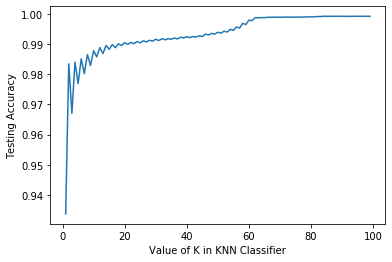

In [34]:
#plot validation accuracy for all the values of k
k = range(1,100)
plt.plot(k , accuracy_list)
plt.xlabel("Value of K in KNN Classifier")
plt.ylabel("Testing Accuracy")
plt.show()

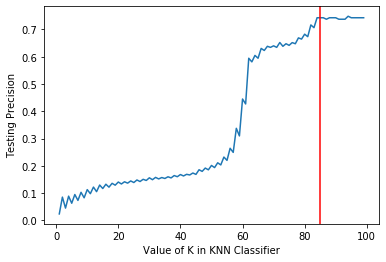

In [40]:
#plot validation precision for all the values of k. I am choosing k=85 based on the plateau reached for precision
plt.plot(k , precision_list)
plt.xlabel("Value of K in KNN Classifier")
plt.ylabel("Testing Precision")
plt.axvline(85,0,1, c = "red")
plt.show()

Text(0, 0.5, 'Testing Recall')

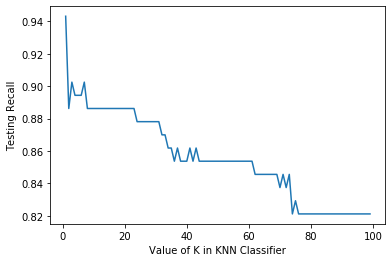

In [37]:
#plot validation recall for all the values of k
plt.plot(k , recall_list)
plt.xlabel("Value of K in KNN Classifier")
plt.ylabel("Testing Recall")
plt.show()

In [41]:
#Build a KNN model with 85 neighbors on undersampled training data and validate on validation data
neigh = KNeighborsClassifier(n_neighbors=85)
neigh.fit(X_rus, y_rus)

#predict using the test data
y_pred = neigh.predict(X_test_standardized)

#print all the related metrics
print("test accuracy", accuracy_score(y_test, y_pred))
print("training accuracy", accuracy_score(y_rus,neigh.predict(X_rus)))

print("The classification report on training data is \n")
print(classification_report(y_rus, neigh.predict(X_rus)))
print("The classification report on test data is \n")
print(classification_report(y_test, neigh.predict(X_test_standardized)))

print(f'Accuracy: {neigh.score(X_test_standardized, y_test)}')
print(f'f-score: {f1_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')

test accuracy 0.9991994606893064
training accuracy 0.9132791327913279
The classification report on training data is 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       369
           1       1.00      0.83      0.91       369

    accuracy                           0.91       738
   macro avg       0.93      0.91      0.91       738
weighted avg       0.93      0.91      0.91       738

The classification report on test data is 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.74      0.82      0.78       123

    accuracy                           1.00     71202
   macro avg       0.87      0.91      0.89     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.9991994606893064
f-score: 0.7799227799227799
recall: 0.8211382113821138
precision: 0.7426470588235294


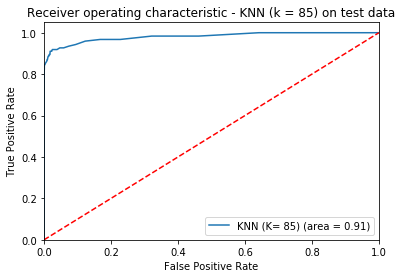

<Figure size 432x288 with 0 Axes>

In [44]:
#plot the ROC curve for validation data
roc_auc = roc_auc_score(y_test, neigh.predict(X_test_standardized))
fpr, tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test_standardized)[:,1])

#customizing the plot
plt.figure()
plt.plot(fpr, tpr, label='KNN (K= 85) (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - KNN (k = 85) on test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()
plt.show()